# CSO Flow Quantity Predictions Using Tree Based Methods

In [1]:
# packages used in this tutorial 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# keras is only to get boston housing data
# boston housing is also here: from sklearn.datasets import load_boston
#import tensorflow as tf
from tensorflow import keras

# gradient boosting 
from xgboost import XGBRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error

# Create Train and Test Sets

Dataset Length:  2435
Dataset Shape:  (2435, 14)


Text(0, 0.5, 'CSO Flow Quantity')

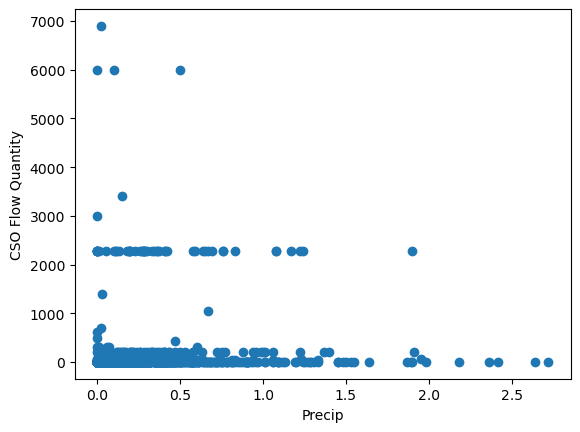

In [2]:
csos = pd.read_excel(r"C:\Users\18455\EAEE4000_ML_Jupyter\data_rev1\clean_merged_data_rev1.xlsx")
# training_data, testing_data = train_test_split(csos, test_size=0.2, random_state=25) # Shuffle = True is default. Kept as is for NN. 
print ("Dataset Length: ", len(csos))
print ("Dataset Shape: ", csos.shape)
csos.head()
a = csos['Precip']
b = csos['Quantity_gpm']
plt.scatter(a, b)
plt.xlabel('Precip')
plt.ylabel('CSO Flow Quantity')

In [3]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [20]:
# Split the dataset & Separate the target variable
X = csos[['Precip', 'Snow', 'Snow_Depth','Temp_avg','Wind_dir2','Wind_dir5','Wind_speed2','Wind_speed5']]
Y = csos[['Quantity_gpm']]
# Split data into train and test sets
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, Y, test_size = 0.2, random_state = 25)

In [21]:
# Standardization (Done after splitting the data)
# try normalizing as well. Better results (error & loss graphs) using standardization than normalization. Is this due to data imbalance? 
min_x, max_x = X_train_df.min(), X_train_df.max() # avoid data leakage by not using test in standardization
min_y, max_y = y_train_df.min(), y_train_df.max()

X_train_df   = (X_train_df - min_x)/(max_x - min_x)
X_test_df    = (X_test_df - min_x)/(max_x - min_x)

y_train_df   = (y_train_df - min_y)/(max_y - min_y)
y_test_df    = (y_test_df - min_y)/(max_y - min_y)

X_train = X_train_df.to_numpy()
y_train = y_train_df.to_numpy()
X_test = X_test_df.to_numpy()
y_test = y_test_df.to_numpy()

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1948, 8) (1948, 1)
(487, 8) (487, 1)


In [22]:
y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

# Random Forest Regression Model

In [23]:
# RFR parameters (random forest regression)
params_rfr = {'n_estimators':1000,
              'criterion':'squared_error', 
              #'ccp_alpha':0.001,
              'max_depth': 10,         # Notes 10/19 Complexity of the tree you want to use
              #'min_samples_leaf':1,
              #'min_samples_split':5,
              'bootstrap':True,
              'max_features':None}

In [24]:
model = RandomForestRegressor(**params_rfr)

In [25]:
%%time
model.fit(X_train, y_train)

<timed eval>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: total: 3.75 s
Wall time: 3.8 s


RandomForestRegressor(max_depth=10, max_features=None, n_estimators=1000)

# Evaluate and Predict

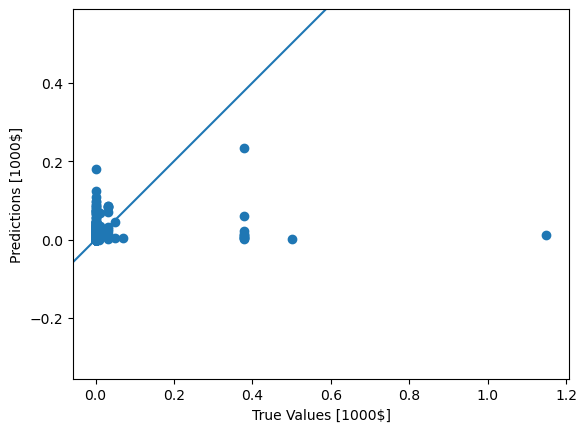

In [26]:
test_predictions = model.predict(X_test)

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

In [27]:
mse = mean_squared_error(y_test, test_predictions)
print(f'the mse is {mse}')

# print out the prediction scores
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_predictions))))
print('MAE: {}'.format(mean_absolute_error(y_test, y_predictions)))
print('R-squared: {}'.format(r2_score(y_test, y_predictions)))

the mse is 0.00618466746067294


In [28]:
column_names = ['Precip', 'Snow','Snow_Depth','Temp_avg','Wind_dir2','Wind_dir5','Wind_speed2','Wind_speed5']

df = pd.DataFrame(X_train, columns=column_names)
df.head()

,Precip,Snow,Snow_Depth,Temp_avg,Wind_dir2,Wind_dir5,Wind_speed2,Wind_speed5
0,0.003788,0.000000,0.000000,0.395833,0.257143,0.194444,0.219512,0.312608
1,0.340909,0.000000,0.000000,0.822917,0.971429,0.388889,0.197561,0.293610
2,0.000000,0.000000,0.000000,0.635417,0.971429,0.972222,0.219512,0.328152
3,0.068182,0.111111,0.429003,0.333333,0.657143,0.694444,0.268293,0.362694
4,0.022727,0.148148,0.214502,0.104167,0.714286,0.694444,0.485366,0.606218


# Plot Feature Importance

In [29]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

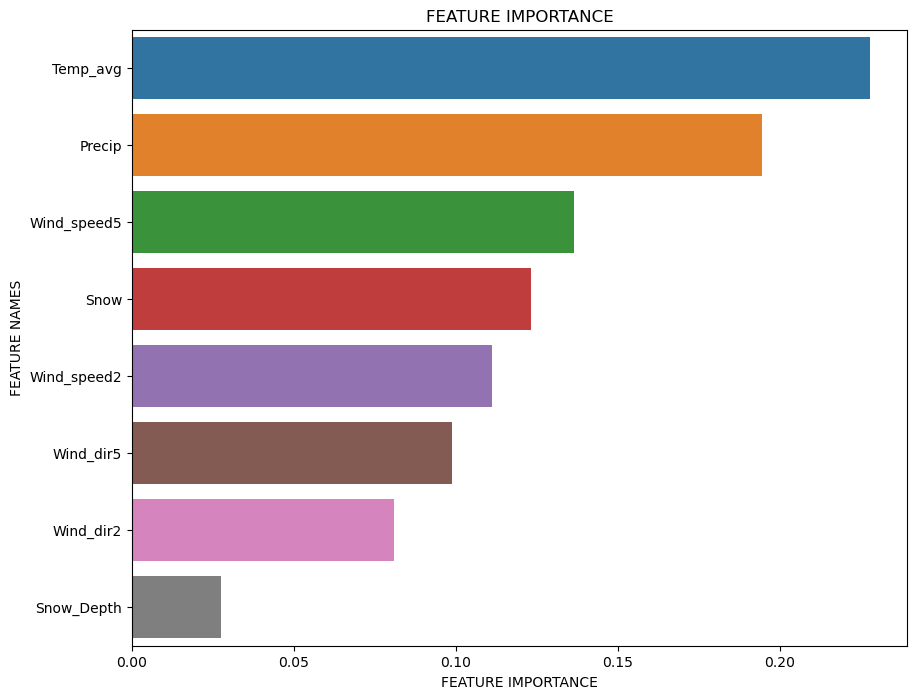

In [30]:
plot_feature_importance(model.feature_importances_, df.columns)

# Gradient Boosting Method

In [31]:
# XGB parameters (extreme gradient boosting)
params_xgb = {'objective': 'reg:squarederror',
              #'base_score': 0.5,     # chosen as median of validation set
              'n_estimators': 2000,  # number of trees to use
              'learning_rate': 0.01, 
              'max_depth': 30,       # how many levels are in each tree
              #'subsample': 1,
              #'colsample_bytree': 0.8,
              # REGULARIZATION  alpha (L2) and lambda (L1)
              'reg_alpha': 1,
              'reg_lambda': 0,}

In [32]:
model = XGBRegressor(**params_xgb)

In [33]:
%%time
model.fit(X_train, y_train)

CPU times: total: 11.9 s
Wall time: 1.7 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=30, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=2000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=1, reg_lambda=0, ...)

# Evaluate and Predict

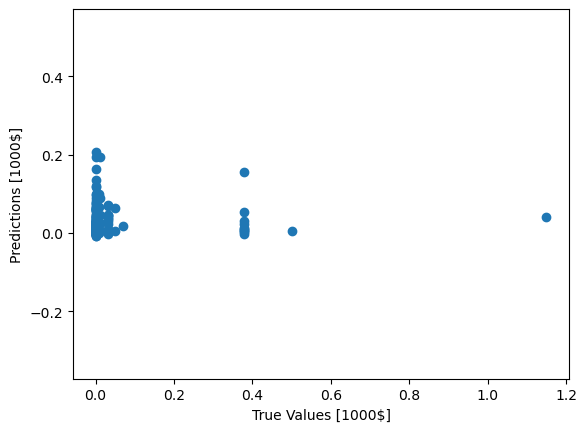

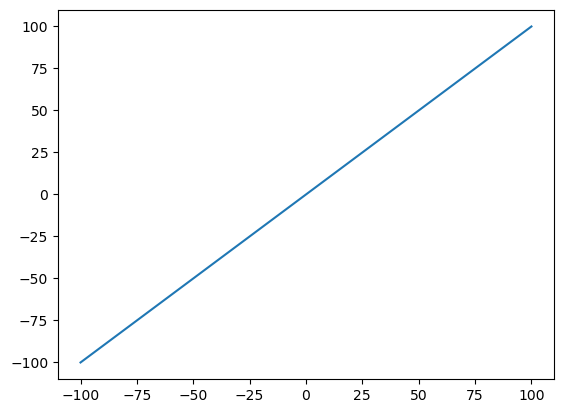

In [34]:
test_predictions = model.predict(X_test)

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()
_ = plt.plot([-100, 100], [-100, 100])

In [35]:
# histogram

In [36]:
mse = mean_squared_error(y_test, test_predictions)
print(f'the mse is {mse}')

the mse is 0.006316427541795629


In [37]:
column_names = ['Precip', 'Snow','Snow_Depth','Temp_avg','Wind_dir2','Wind_dir5','Wind_speed2','Wind_speed5']

df = pd.DataFrame(X_train, columns=column_names)
df.head()

,Precip,Snow,Snow_Depth,Temp_avg,Wind_dir2,Wind_dir5,Wind_speed2,Wind_speed5
0,0.003788,0.000000,0.000000,0.395833,0.257143,0.194444,0.219512,0.312608
1,0.340909,0.000000,0.000000,0.822917,0.971429,0.388889,0.197561,0.293610
2,0.000000,0.000000,0.000000,0.635417,0.971429,0.972222,0.219512,0.328152
3,0.068182,0.111111,0.429003,0.333333,0.657143,0.694444,0.268293,0.362694
4,0.022727,0.148148,0.214502,0.104167,0.714286,0.694444,0.485366,0.606218


# Plot Feature Importance

In [38]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

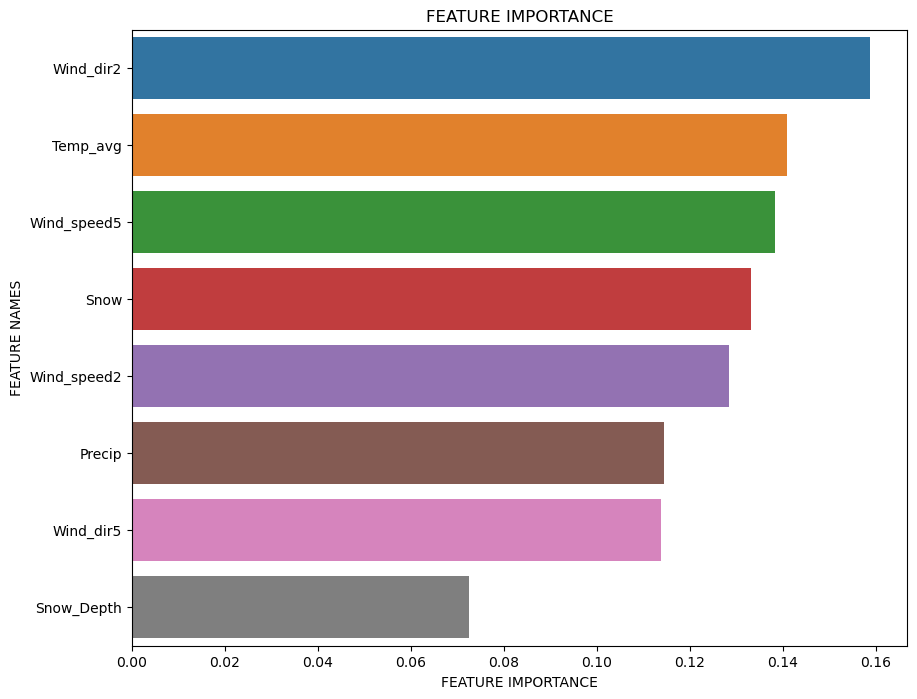

In [39]:
plot_feature_importance(model.feature_importances_, df.columns)

# Scratch Work

In [63]:
def tarin_using_entropy(X_train, X_test, y_train):
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [64]:
clf_entropy

NameError: name 'clf_entropy' is not defined

In [62]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 25,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

ValueError: Unknown label type: 'unknown'